In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn import preprocessing
%matplotlib inline
from scipy.signal import butter, lfilter, freqz
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from collections import Counter
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import  Dense, LSTM, Dropout
from keras.layers import Flatten
from keras.regularizers import L1L2
import keras_tuner as kt
from keras import regularizers

In [100]:
df = pd.read_csv("sitting.csv")
df

,Acc_X,Acc_Y,Acc_Z
0,-6.205486,-1.015903,7.589884
1,-6.209225,-1.021436,7.584799
2,-6.223582,-1.031307,7.569993
3,-6.228817,-1.034298,7.561918
4,-6.228518,-1.033101,7.566105
...,...,...,...
588,-6.116204,-1.027717,7.653593
589,-6.117251,-1.022034,7.658528
590,-6.111419,-1.019642,7.665257
591,-6.103044,-1.009921,7.669296


In [101]:
df.shape

(593, 3)

In [102]:
X = df

In [103]:
print("DF HEAD: ",df.head)
print("DF DTYPE: ",df.dtypes)
print("DF SHAPE: ",df.shape)

print("DF ISNULL: ",df.isnull().sum())

DF HEAD:  <bound method NDFrame.head of         Acc_X     Acc_Y     Acc_Z
0   -6.205486 -1.015903  7.589884
1   -6.209225 -1.021436  7.584799
2   -6.223582 -1.031307  7.569993
3   -6.228817 -1.034298  7.561918
4   -6.228518 -1.033101  7.566105
..        ...       ...       ...
588 -6.116204 -1.027717  7.653593
589 -6.117251 -1.022034  7.658528
590 -6.111419 -1.019642  7.665257
591 -6.103044 -1.009921  7.669296
592 -6.092725 -1.007229  7.675876

[593 rows x 3 columns]>
DF DTYPE:  Acc_X    float64
Acc_Y    float64
Acc_Z    float64
dtype: object
DF SHAPE:  (593, 3)
DF ISNULL:  Acc_X    0
Acc_Y    0
Acc_Z    0
dtype: int64


In [104]:
import plotly.express as px
import seaborn as sns
dfv= df[["Acc_X","Acc_Y","Acc_Z"]]
dfbv=dfv.isnull().sum()


sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
#data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(dfbv,title="Checking for Null values")

fig.show()

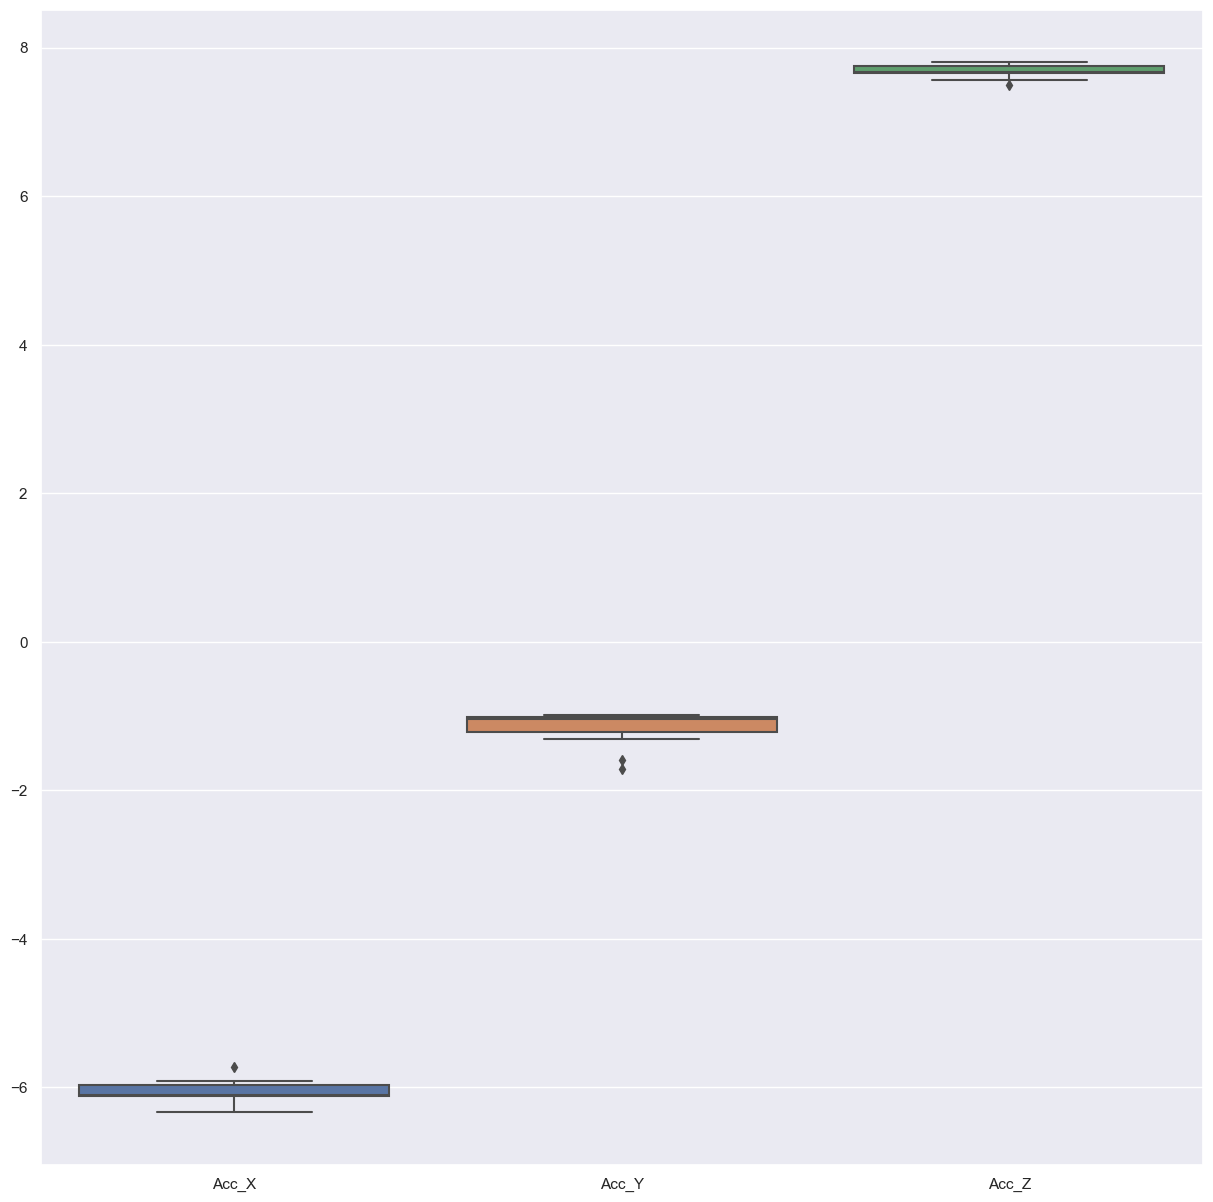

In [105]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig= sns.boxplot(data=df.iloc[0:25955,0:3])
figure=fig.get_figure()
figure.savefig("withOutliers.png")

In [106]:
Q1x = df['Acc_X'].quantile(0.25)
Q1y = df['Acc_Y'].quantile(0.25)   
Q1z = df['Acc_Z'].quantile(0.25)

Q3x = df['Acc_X'].quantile(0.75)
Q3y = df['Acc_Y'].quantile(0.75)   
Q3z = df['Acc_Z'].quantile(0.75)
  
IQRx = Q3x - Q1x
IQRy = Q3y - Q1y
IQRz = Q3z - Q1z

lim1x=(Q1x- 1.5 * IQRx)
lim1y=(Q1y- 1.5 * IQRy)
lim1z=(Q1z- 1.5 * IQRz)

lim2x=(Q3x + 1.5 * IQRx)
lim2y=(Q3y + 1.5 * IQRy)
lim2z=(Q3z + 1.5 * IQRz)

tenthx= df['Acc_X'].quantile(0.10)
tenthy= df['Acc_Y'].quantile(0.10)
tenthz= df['Acc_Z'].quantile(0.10)

ninetyx=df['Acc_X'].quantile(0.90)
ninetyy=df['Acc_Y'].quantile(0.90)
ninetyz=df['Acc_Z'].quantile(0.90)
    
# print(tenthx,ninetyx)
df['Acc_X']=np.where(df['Acc_X']<lim1x,tenthx,df['Acc_X'])
df['Acc_X']=np.where(df['Acc_X']>lim2x,ninetyx,df['Acc_X'])

df['Acc_Y']=np.where(df['Acc_Y']<lim1y,tenthy,df['Acc_Y'])
df['Acc_Y']=np.where(df['Acc_Y']>lim2y,ninetyy,df['Acc_Y'])

df['Acc_Z']=np.where(df['Acc_Z']<lim1z,tenthz,df['Acc_Z'])
df['Acc_Z']=np.where(df['Acc_Z']>lim2z,ninetyz,df['Acc_Z'])

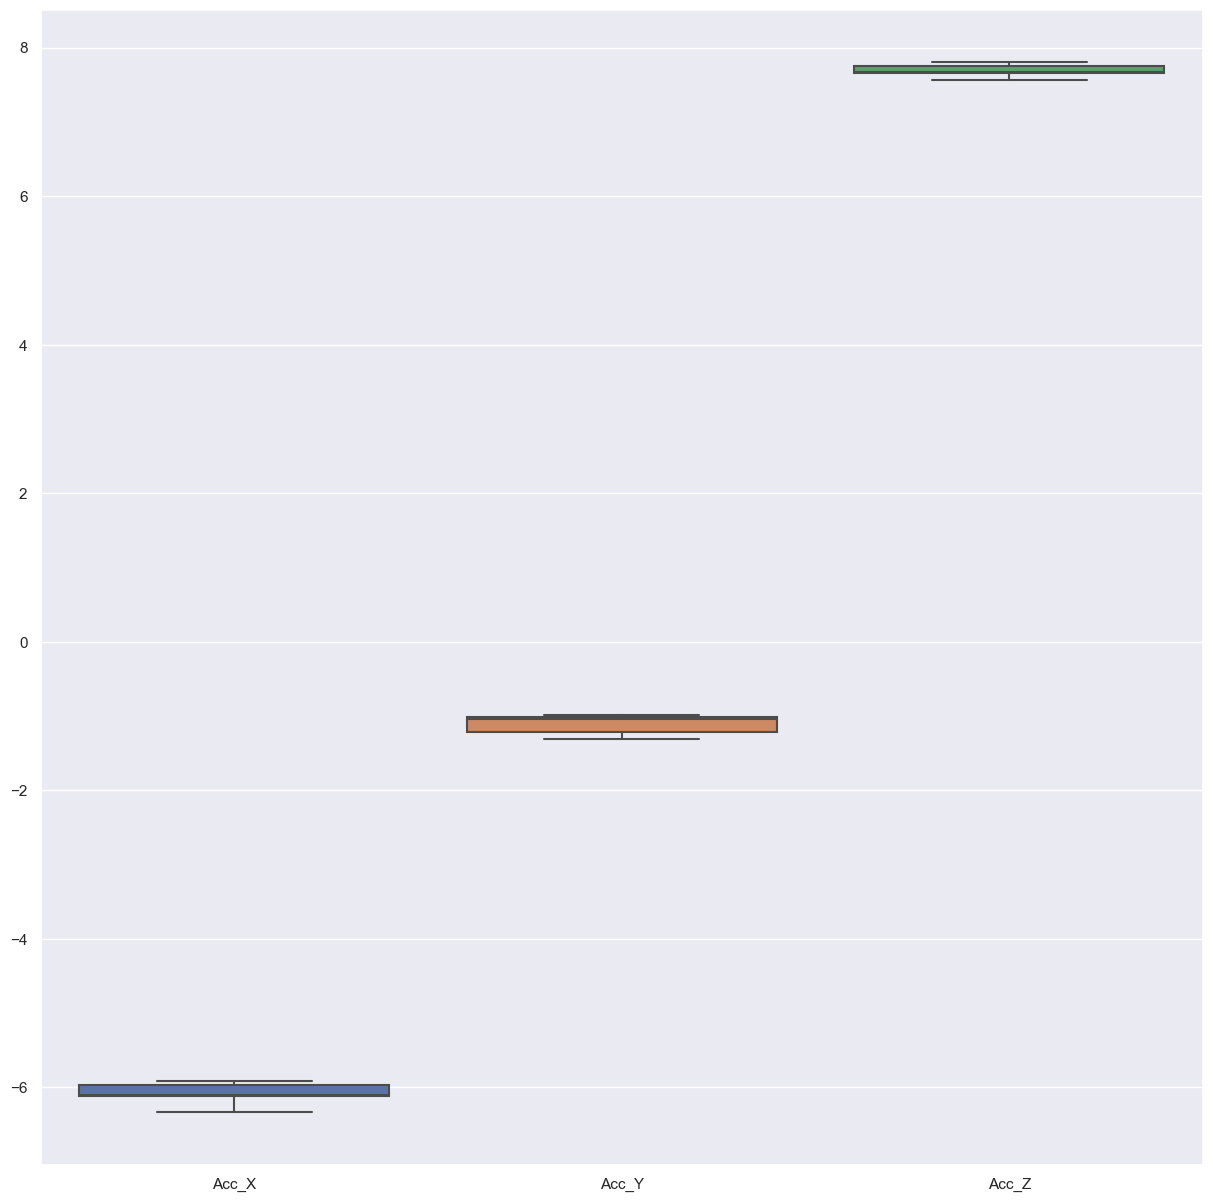

In [107]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig=sns.boxplot(data=df.iloc[0:6000,0:3],whis=[0, 100])
count=0
figure=fig.get_figure()
figure.savefig("withOut_Outliers(Final Har_intensity).png")

In [108]:
def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    print(b,a)
    y = lfilter(b, a, data)
    return y

df['Acc_X']= butter_lowpass_filter(df['Acc_X'], 10, 100, 10)
df['Acc_Y']= butter_lowpass_filter(df['Acc_Y'], 10, 100, 10)
df['Acc_Z']= butter_lowpass_filter(df['Acc_Z'], 10, 100, 10)

[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1

In [109]:
#feature enginerring
df=df.eval('Mean = (Acc_X+Acc_Y+Acc_Z)/3')
df['Median']=df.loc[:,['Acc_X','Acc_Y','Acc_Z']].median(axis=1)
df['Variance']=df.loc[:,['Acc_X','Acc_Y','Acc_Z']].var(axis=1)
df['Standard_Deviation']=df.loc[:,['Acc_X','Acc_Y','Acc_Z']].std(axis=1)
df

,Acc_X,Acc_Y,Acc_Z,Mean,Median,Variance,Standard_Deviation
0,-0.000010,-0.000002,0.000013,2.067971e-07,-0.000002,1.376141e-10,0.000012
1,-0.000177,-0.000029,0.000217,3.504927e-06,-0.000029,3.971203e-08,0.000199
2,-0.001474,-0.000241,0.001802,2.900841e-05,-0.000241,2.737498e-06,0.001655
3,-0.007999,-0.001311,0.009781,1.567945e-04,-0.001311,8.064677e-05,0.008980
4,-0.032042,-0.005254,0.039170,6.246630e-04,-0.005254,1.293688e-03,0.035968
...,...,...,...,...,...,...,...
588,-6.097577,-1.008158,7.674011,1.894256e-01,-1.008158,4.848981e+01,6.963463
589,-6.099444,-1.007688,7.672688,1.885187e-01,-1.007688,4.849109e+01,6.963555
590,-6.101551,-1.008121,7.670970,1.870995e-01,-1.008121,4.849200e+01,6.963620
591,-6.103941,-1.009584,7.668865,1.851132e-01,-1.009584,4.849302e+01,6.963693


In [110]:
sort=np.sort(df.loc[:,['Acc_X','Acc_Y','Acc_Z']],axis=1)

q3=[]
q1=[]
for x in sort:

    q3x,q1x= np.percentile(x,[75,25])
    q3.append(q3x)
    q1.append(q1x)
df['Q3']=q3
df['Q1']=q1
df

,Acc_X,Acc_Y,Acc_Z,Mean,Median,Variance,Standard_Deviation,Q3,Q1
0,-0.000010,-0.000002,0.000013,2.067971e-07,-0.000002,1.376141e-10,0.000012,0.000006,-0.000006
1,-0.000177,-0.000029,0.000217,3.504927e-06,-0.000029,3.971203e-08,0.000199,0.000094,-0.000103
2,-0.001474,-0.000241,0.001802,2.900841e-05,-0.000241,2.737498e-06,0.001655,0.000780,-0.000858
3,-0.007999,-0.001311,0.009781,1.567945e-04,-0.001311,8.064677e-05,0.008980,0.004235,-0.004655
4,-0.032042,-0.005254,0.039170,6.246630e-04,-0.005254,1.293688e-03,0.035968,0.016958,-0.018648
...,...,...,...,...,...,...,...,...,...
588,-6.097577,-1.008158,7.674011,1.894256e-01,-1.008158,4.848981e+01,6.963463,3.332927,-3.552867
589,-6.099444,-1.007688,7.672688,1.885187e-01,-1.007688,4.849109e+01,6.963555,3.332500,-3.553566
590,-6.101551,-1.008121,7.670970,1.870995e-01,-1.008121,4.849200e+01,6.963620,3.331425,-3.554836
591,-6.103941,-1.009584,7.668865,1.851132e-01,-1.009584,4.849302e+01,6.963693,3.329640,-3.556762


In [111]:
def getZCR(arr):
        my_array = np.array(arr)
        return float("{0:.2f}".format((((my_array[:-1] * my_array[1:]) < 0).sum())/len(arr)))
zcr=[]
arr2=np.array(df.loc[:,['Acc_X','Acc_Y','Acc_Z']])


for x in arr2:
    zcr.append(getZCR(x))
df['ZCR']=zcr
df

,Acc_X,Acc_Y,Acc_Z,Mean,Median,Variance,Standard_Deviation,Q3,Q1,ZCR
0,-0.000010,-0.000002,0.000013,2.067971e-07,-0.000002,1.376141e-10,0.000012,0.000006,-0.000006,0.33
1,-0.000177,-0.000029,0.000217,3.504927e-06,-0.000029,3.971203e-08,0.000199,0.000094,-0.000103,0.33
2,-0.001474,-0.000241,0.001802,2.900841e-05,-0.000241,2.737498e-06,0.001655,0.000780,-0.000858,0.33
3,-0.007999,-0.001311,0.009781,1.567945e-04,-0.001311,8.064677e-05,0.008980,0.004235,-0.004655,0.33
4,-0.032042,-0.005254,0.039170,6.246630e-04,-0.005254,1.293688e-03,0.035968,0.016958,-0.018648,0.33
...,...,...,...,...,...,...,...,...,...,...
588,-6.097577,-1.008158,7.674011,1.894256e-01,-1.008158,4.848981e+01,6.963463,3.332927,-3.552867,0.33
589,-6.099444,-1.007688,7.672688,1.885187e-01,-1.007688,4.849109e+01,6.963555,3.332500,-3.553566,0.33
590,-6.101551,-1.008121,7.670970,1.870995e-01,-1.008121,4.849200e+01,6.963620,3.331425,-3.554836,0.33
591,-6.103941,-1.009584,7.668865,1.851132e-01,-1.009584,4.849302e+01,6.963693,3.329640,-3.556762,0.33


In [112]:
def getMCR(arr):
    return getZCR(np.array(arr) - np.mean(arr))

MCR=[]
arr2=np.array(df.loc[:,['Acc_X','Acc_Y','Acc_Z']])

for x in arr2:
        MCR.append(getMCR(x))

df['MCR']=MCR
df

,Acc_X,Acc_Y,Acc_Z,Mean,Median,Variance,Standard_Deviation,Q3,Q1,ZCR,MCR
0,-0.000010,-0.000002,0.000013,2.067971e-07,-0.000002,1.376141e-10,0.000012,0.000006,-0.000006,0.33,0.33
1,-0.000177,-0.000029,0.000217,3.504927e-06,-0.000029,3.971203e-08,0.000199,0.000094,-0.000103,0.33,0.33
2,-0.001474,-0.000241,0.001802,2.900841e-05,-0.000241,2.737498e-06,0.001655,0.000780,-0.000858,0.33,0.33
3,-0.007999,-0.001311,0.009781,1.567945e-04,-0.001311,8.064677e-05,0.008980,0.004235,-0.004655,0.33,0.33
4,-0.032042,-0.005254,0.039170,6.246630e-04,-0.005254,1.293688e-03,0.035968,0.016958,-0.018648,0.33,0.33
...,...,...,...,...,...,...,...,...,...,...,...
588,-6.097577,-1.008158,7.674011,1.894256e-01,-1.008158,4.848981e+01,6.963463,3.332927,-3.552867,0.33,0.33
589,-6.099444,-1.007688,7.672688,1.885187e-01,-1.007688,4.849109e+01,6.963555,3.332500,-3.553566,0.33,0.33
590,-6.101551,-1.008121,7.670970,1.870995e-01,-1.008121,4.849200e+01,6.963620,3.331425,-3.554836,0.33,0.33
591,-6.103941,-1.009584,7.668865,1.851132e-01,-1.009584,4.849302e+01,6.963693,3.329640,-3.556762,0.33,0.33


In [113]:
from math import e
def entropy4(labels, base=None):
    value,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()
    base = e if base is None else base
    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

y=[]
sort=np.sort(df.loc[:,['Acc_X','Acc_Y','Acc_Z']],axis=1)

for x in sort:
    y.append(entropy4(x))
df['Entropy']=y
df

,Acc_X,Acc_Y,Acc_Z,Mean,Median,Variance,Standard_Deviation,Q3,Q1,ZCR,MCR,Entropy
0,-0.000010,-0.000002,0.000013,2.067971e-07,-0.000002,1.376141e-10,0.000012,0.000006,-0.000006,0.33,0.33,1.098612
1,-0.000177,-0.000029,0.000217,3.504927e-06,-0.000029,3.971203e-08,0.000199,0.000094,-0.000103,0.33,0.33,1.098612
2,-0.001474,-0.000241,0.001802,2.900841e-05,-0.000241,2.737498e-06,0.001655,0.000780,-0.000858,0.33,0.33,1.098612
3,-0.007999,-0.001311,0.009781,1.567945e-04,-0.001311,8.064677e-05,0.008980,0.004235,-0.004655,0.33,0.33,1.098612
4,-0.032042,-0.005254,0.039170,6.246630e-04,-0.005254,1.293688e-03,0.035968,0.016958,-0.018648,0.33,0.33,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...
588,-6.097577,-1.008158,7.674011,1.894256e-01,-1.008158,4.848981e+01,6.963463,3.332927,-3.552867,0.33,0.33,1.098612
589,-6.099444,-1.007688,7.672688,1.885187e-01,-1.007688,4.849109e+01,6.963555,3.332500,-3.553566,0.33,0.33,1.098612
590,-6.101551,-1.008121,7.670970,1.870995e-01,-1.008121,4.849200e+01,6.963620,3.331425,-3.554836,0.33,0.33,1.098612
591,-6.103941,-1.009584,7.668865,1.851132e-01,-1.009584,4.849302e+01,6.963693,3.329640,-3.556762,0.33,0.33,1.098612


In [114]:
for index, row in df.iterrows():
     rms=np.sqrt(((df['Acc_X'] ** 2) + (df['Acc_Y'] ** 2) +(df['Acc_Z'] ** 2))/3)
df['RMS']=rms
df

,Acc_X,Acc_Y,Acc_Z,Mean,Median,Variance,Standard_Deviation,Q3,Q1,ZCR,MCR,Entropy,RMS
0,-0.000010,-0.000002,0.000013,2.067971e-07,-0.000002,1.376141e-10,0.000012,0.000006,-0.000006,0.33,0.33,1.098612,0.000010
1,-0.000177,-0.000029,0.000217,3.504927e-06,-0.000029,3.971203e-08,0.000199,0.000094,-0.000103,0.33,0.33,1.098612,0.000163
2,-0.001474,-0.000241,0.001802,2.900841e-05,-0.000241,2.737498e-06,0.001655,0.000780,-0.000858,0.33,0.33,1.098612,0.001351
3,-0.007999,-0.001311,0.009781,1.567945e-04,-0.001311,8.064677e-05,0.008980,0.004235,-0.004655,0.33,0.33,1.098612,0.007334
4,-0.032042,-0.005254,0.039170,6.246630e-04,-0.005254,1.293688e-03,0.035968,0.016958,-0.018648,0.33,0.33,1.098612,0.029374
...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,-6.097577,-1.008158,7.674011,1.894256e-01,-1.008158,4.848981e+01,6.963463,3.332927,-3.552867,0.33,0.33,1.098612,5.688798
589,-6.099444,-1.007688,7.672688,1.885187e-01,-1.007688,4.849109e+01,6.963555,3.332500,-3.553566,0.33,0.33,1.098612,5.688843
590,-6.101551,-1.008121,7.670970,1.870995e-01,-1.008121,4.849200e+01,6.963620,3.331425,-3.554836,0.33,0.33,1.098612,5.688849
591,-6.103941,-1.009584,7.668865,1.851132e-01,-1.009584,4.849302e+01,6.963693,3.329640,-3.556762,0.33,0.33,1.098612,5.688844


In [115]:
X=df
df

,Acc_X,Acc_Y,Acc_Z,Mean,Median,Variance,Standard_Deviation,Q3,Q1,ZCR,MCR,Entropy,RMS
0,-0.000010,-0.000002,0.000013,2.067971e-07,-0.000002,1.376141e-10,0.000012,0.000006,-0.000006,0.33,0.33,1.098612,0.000010
1,-0.000177,-0.000029,0.000217,3.504927e-06,-0.000029,3.971203e-08,0.000199,0.000094,-0.000103,0.33,0.33,1.098612,0.000163
2,-0.001474,-0.000241,0.001802,2.900841e-05,-0.000241,2.737498e-06,0.001655,0.000780,-0.000858,0.33,0.33,1.098612,0.001351
3,-0.007999,-0.001311,0.009781,1.567945e-04,-0.001311,8.064677e-05,0.008980,0.004235,-0.004655,0.33,0.33,1.098612,0.007334
4,-0.032042,-0.005254,0.039170,6.246630e-04,-0.005254,1.293688e-03,0.035968,0.016958,-0.018648,0.33,0.33,1.098612,0.029374
...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,-6.097577,-1.008158,7.674011,1.894256e-01,-1.008158,4.848981e+01,6.963463,3.332927,-3.552867,0.33,0.33,1.098612,5.688798
589,-6.099444,-1.007688,7.672688,1.885187e-01,-1.007688,4.849109e+01,6.963555,3.332500,-3.553566,0.33,0.33,1.098612,5.688843
590,-6.101551,-1.008121,7.670970,1.870995e-01,-1.008121,4.849200e+01,6.963620,3.331425,-3.554836,0.33,0.33,1.098612,5.688849
591,-6.103941,-1.009584,7.668865,1.851132e-01,-1.009584,4.849302e+01,6.963693,3.329640,-3.556762,0.33,0.33,1.098612,5.688844


In [116]:
N_TIME_STEPS = 10
N_FEATURES = 13
step = 1
segments = []
labels = []

#segemting data
for i in range(0, len(df) - N_TIME_STEPS, step):
    accxs = df['Acc_X'].values[i: i + N_TIME_STEPS]
    accys = df['Acc_Y'].values[i: i + N_TIME_STEPS]
    acczs = df['Acc_Z'].values[i: i + N_TIME_STEPS]
    mean = df['Mean'].values[i: i + N_TIME_STEPS]
    median = df['Median'].values[i: i + N_TIME_STEPS]
    variance = df['Variance'].values[i: i + N_TIME_STEPS]
    SD = df['Standard_Deviation'].values[i: i + N_TIME_STEPS]
    rms = df['RMS'].values[i: i + N_TIME_STEPS]
    q3 = df['Q3'].values[i: i + N_TIME_STEPS]
    q1 = df['Q1'].values[i: i + N_TIME_STEPS]
    Zcr = df['ZCR'].values[i: i + N_TIME_STEPS]
    mcr = df['MCR'].values[i: i + N_TIME_STEPS]
    entrophy = df['Entropy'].values[i: i + N_TIME_STEPS]
    
#     label = stats.mode(df['Class'][i: i + N_TIME_STEPS])[0][0]
    segments.append([accxs, accys, acczs,mean,median,variance,SD,rms,q3,q1,Zcr,mcr,entrophy]) 
#     labels.append(label)
    

print("SEGMENTS SHAPE: ",np.array(segments).shape)
# print("LABELS SHAPE: ",np.array(labels).shape)

SEGMENTS SHAPE:  (583, 13, 10)


In [117]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
print("RESHAPE SHAPE: ",reshaped_segments.shape)

RESHAPE SHAPE:  (583, 10, 13)


In [118]:
X_train, X_test = train_test_split(reshaped_segments, test_size=0.20) # 0.25 x 0.8 = 0.2
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
# print("y_train shape: {}".format(y_train.shape))
# print("y_test shape: {}".format(y_test.shape))
# print("X_val shape: {}".format(X_val.shape))
# print("y val shape: {}".format(y_val.shape))

X_train shape: (466, 10, 13)
X_test shape: (117, 10, 13)


In [34]:
# X1=reshaped_segments.shape
# # X1 = np.expand_dims(X1, 1)
# X1

In [119]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from numpy import array
from keras.models import load_model

loaded_model=tf.keras.models.load_model("modelall9503.h5")
loaded_model

In [ ]:
predict_x=(loaded_model.predict(X_train) > 0.5).astype("int32")
classes_x=np.argmax(predict_x,axis=1)


In [30]:
classes_x

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype=int64)